<a href="https://colab.research.google.com/github/amalmon/RETAIL-SALES-PREDICTION/blob/main/Team_Notebook_by_Gaurav_kinhikar_%2C_Amalkrishna_N_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

Problem Description
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

In [1]:
#importing all necessary libraries
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

from pandas import datetime as dt
from pandas import Series,DataFrame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [2]:
import matplotlib.pyplot as plt  
%matplotlib inline    
import seaborn as sns
import sklearn
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn import metrics

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#mounting drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [6]:
#reading csv file
Data_df = pd.read_csv ("/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /Rossmann Stores Data.csv")

In [7]:
#outlook of data
Data_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
#discription of numerical columns
Data_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
#informations about all columns and dataset
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#checking for null values
Data_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
#reading 2nd file
store_df = pd.read_csv ("/content/drive/MyDrive/Almabetter/capstone projects/Capstone project 2 ML regression /store.csv")

In [12]:
#outlook
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
#informations about all columns and dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
#checking for null values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### **check whether any duplicate entries in both data set**

In [15]:
#for duplicates
Data_df.duplicated().sum()

0

In [16]:
store_df.duplicated().sum()

0

# **Dealing With Missing Values**

# Fill null values

In [17]:
#filling null values with appropriate values
store_df ['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(),inplace = True)
store_df ['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace = True)
store_df ['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace = True)
store_df ['Promo2SinceWeek'].fillna(0, inplace =True)
store_df ['Promo2SinceYear'].fillna(0, inplace =True)
store_df ['PromoInterval'].fillna(0, inplace =True)

## **Date Extraction**

In [18]:
#extracting separate time frames from date column
Data_df['Date'] =pd.to_datetime(Data_df['Date'])
Data_df['Year'] =Data_df['Date'].dt.year
Data_df['Month'] =Data_df['Date'].dt.month
Data_df['Day'] = Data_df['Date'].dt.day
Data_df['Week'] = Data_df['Date'].dt.week%4
Data_df['WeekOfYear'] = Data_df['Date'].dt.week

In [19]:
Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  Week           1017209 non-null  int64         
 13  WeekOfYear     1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(12), o

### **Merging both the datasets**

In [20]:
#merge 2 data sets
Data_df1 =Data_df.merge(store_df, how='outer' , on =['Store'])

In [21]:
#number of columns
Data_df1.columns.value_counts().sum()

23

In [22]:
#column names
Data_df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#**Drop data Where Might Cause Bias**

### **Removing zero sale entries**



In [23]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
Data_df1=Data_df1[Data_df1.Open!=0]

In [24]:
# Open isn't a variable anymore, so we'll drop it
#del df['Open']
Data_df1=Data_df1.drop('Open', axis=1)

In [25]:
# see if there's any opened store with zero sales
Data_df1[Data_df1.Sales==0]['Store'].sum()

31460

In [26]:
# see the percentage of open stored with zero sales
Data_df1[Data_df1.Sales==0]['Sales'].sum()/Data_df1.Sales.sum()

0.0

In [27]:
# remove this part of data to avoid bias
Data_df1=Data_df1[Data_df1.Sales!=0]

# **Numerical features**

In [28]:
#for maxi. value of sales
Data_df1.value_counts('Sales').max()

215

In [33]:
#for min. value of sales
Data_df1.value_counts('Sales').min()

1

In [34]:
#value counts of sales column
Data_df1.value_counts('Sales')

Sales
5674     215
5558     197
5483     196
6214     195
6049     195
        ... 
20188      1
20190      1
20195      1
20200      1
41551      1
Length: 21733, dtype: int64

### **Distribution graph of sales**

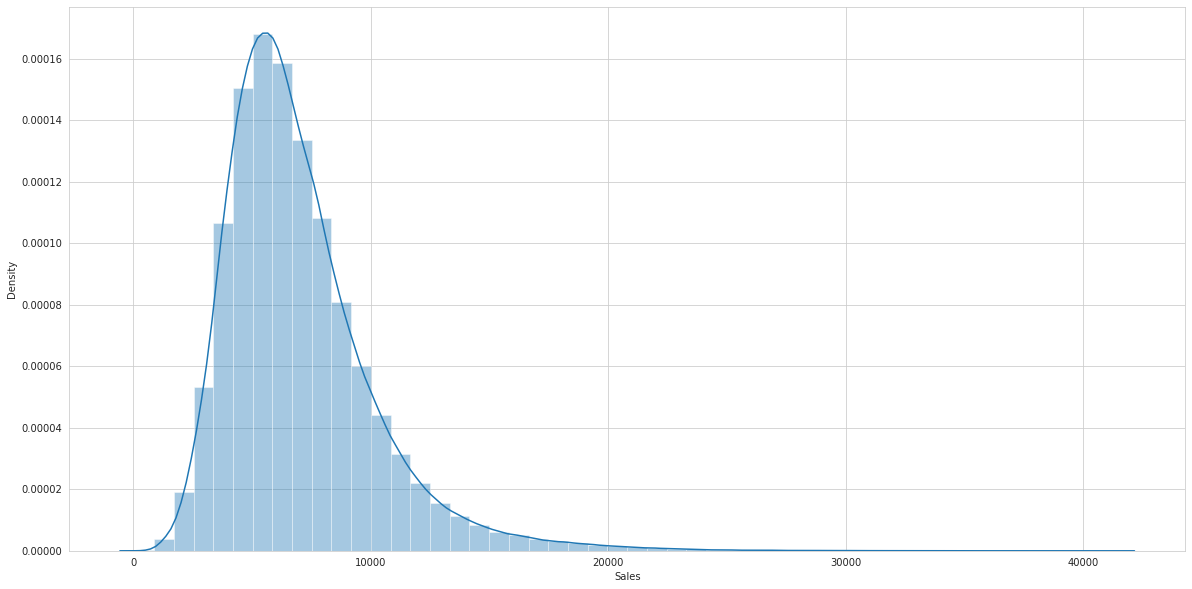

In [35]:
#ploting distribution gragh of sales
plt.figure(figsize=(20,10))
sns.distplot(Data_df1["Sales"])
plt.show()

here it confirms that sales data distribution is postiviely skewed or right skewed

In [36]:
#for maxi. value of customers
Data_df1.value_counts('Customers').max()

2414

In [37]:
#customers value counts
Data_df1.value_counts('Customers')

Customers
560     2414
576     2363
603     2337
571     2330
555     2328
        ... 
3930       1
3922       1
3914       1
3908       1
7388       1
Length: 4083, dtype: int64

### **Distribution graph of customers**

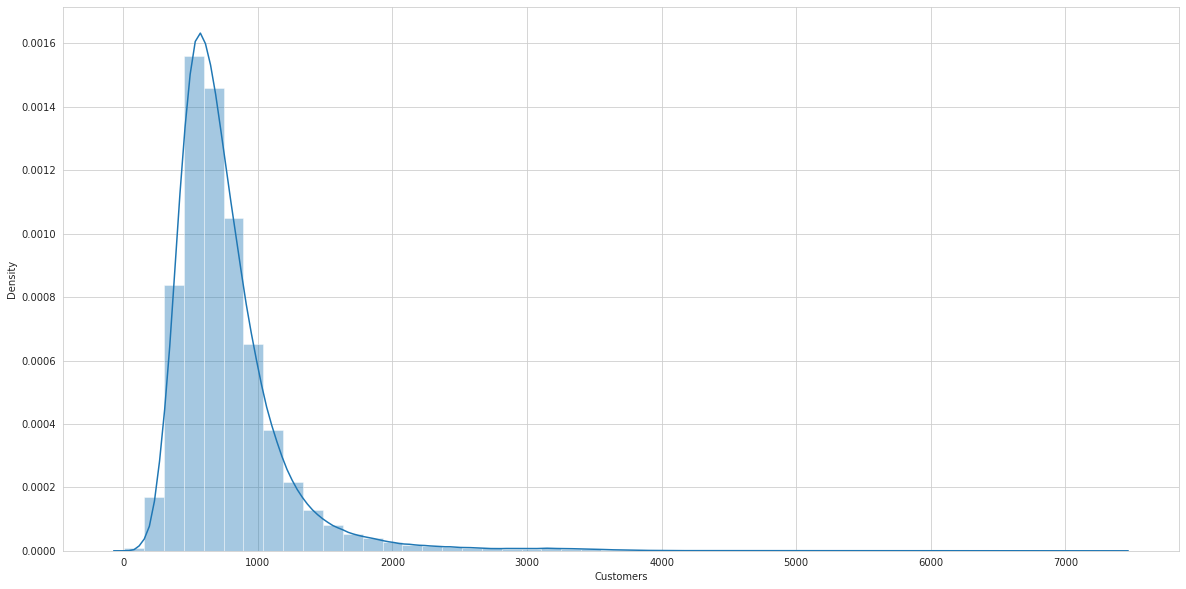

In [38]:
#ploting distribution histogram of customers
plt.figure(figsize=(20,10))
sns.distplot(Data_df1["Customers"])
plt.show()

Customers showning is ( the number of customers on a given day) nearly about 560 customers a day is the highest 

### **scatter plot between sales and customers**

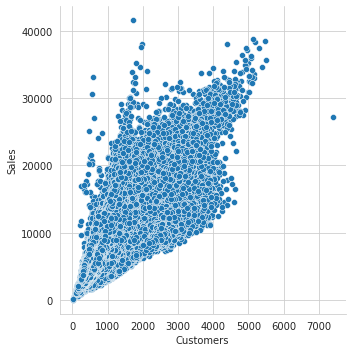

In [39]:
#scater plot of correlation between Customers & Sales
sns.relplot(data=Data_df1, x='Customers',y='Sales')

# **Store Types v/s sales**

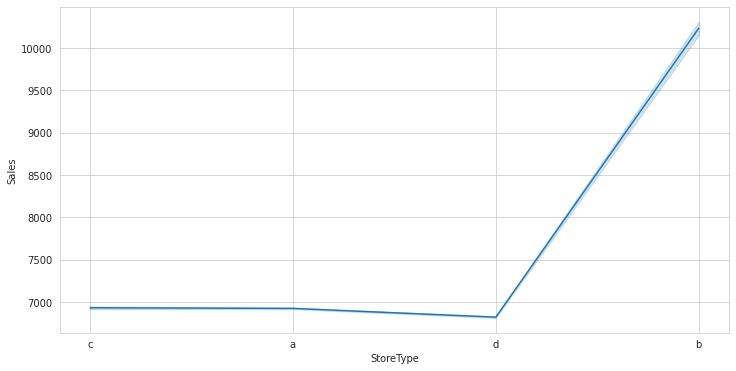

In [40]:
#ploting line plot of avrg. sales and type of stores
plt.figure(figsize=(12,6))
sns.lineplot(x='StoreType',y='Sales',data=Data_df1)

when stores a, c, d making almost same range of sales but store type b making considerably huge amount of sales

In [41]:
#competion distance maxi. value
Data_df1.value_counts('CompetitionDistance').max()

9210

In [42]:
#competion distance min value
Data_df1.value_counts('CompetitionDistance').min()

605

In [43]:
#competition distance value counts
Data_df1.value_counts('CompetitionDistance')

CompetitionDistance
250.0      9210
50.0       6249
350.0      6239
1200.0     6069
190.0      6066
           ... 
2340.0      619
10170.0     618
9670.0      611
17930.0     606
1370.0      605
Length: 655, dtype: int64

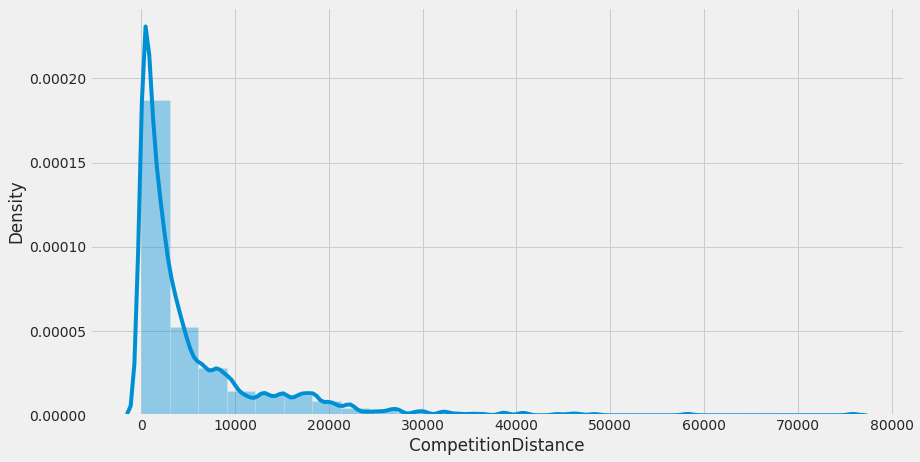

In [44]:
#distribution histogram plot for competition distance
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(Data_df1['CompetitionDistance'], bins=25)

# CompetitionDistance is basically (distance in meters to the nearest competitor store) is showing 9,210 M about less than 1 KM had the highest competions

# **Categorical Features**

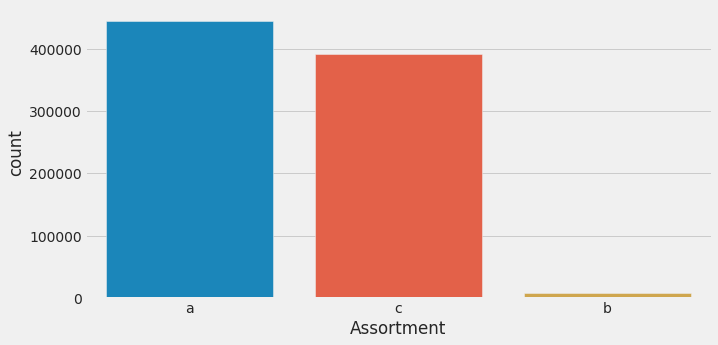

In [45]:
#bar count plot of total counts of assortments
plt.figure(figsize=(10,5))
sns.countplot(x='Assortment',data = Data_df1)

# Describes an assortment level: (a = basic, b = extra, c = extended) a and c is showing highest Assortment level 

## ***assortment of store verses sales***

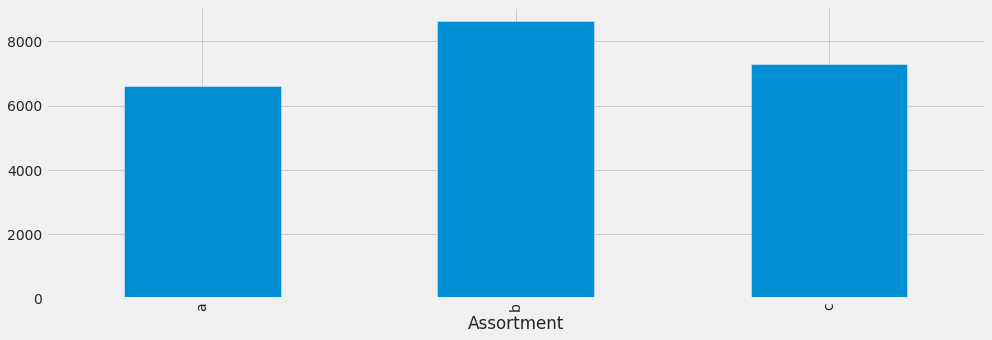

In [46]:
#bar plot of assortment v/s avg sales
bplt1=Data_df1.groupby(['Assortment'])['Sales'].mean().plot.bar(figsize=(15,5))

(a = basic, b = extra, c = extended)

Assortment level b have more sales

### **sales over days**

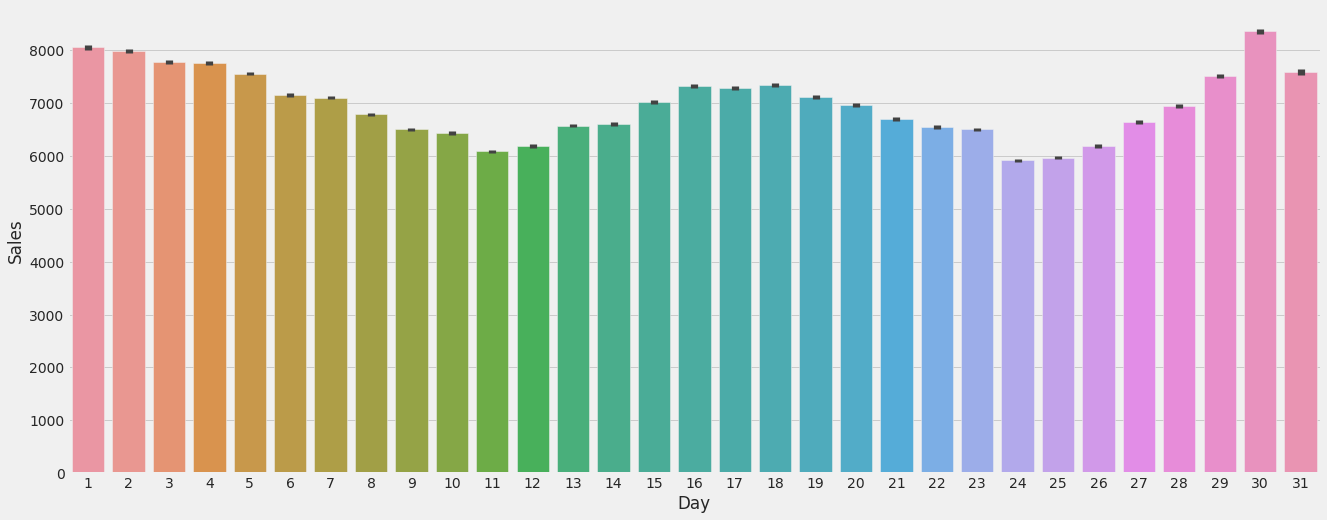

In [47]:
#barplot of sales over days in a month
fig, ax = plt.subplots(figsize=(20, 8));
sns.barplot(data = Data_df1, x = "Day", y = "Sales", ax=ax)


### **Day of week v/s sales distribution**

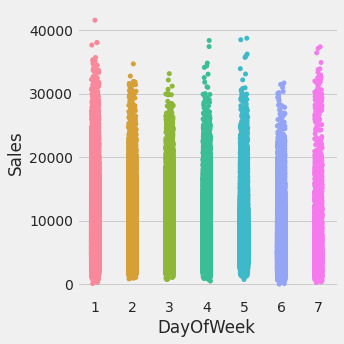

In [48]:
#catplot of sales per day in weekly time frame
sns.catplot(data=Data_df1,x='DayOfWeek',y='Sales')

## **monthly sales over years**

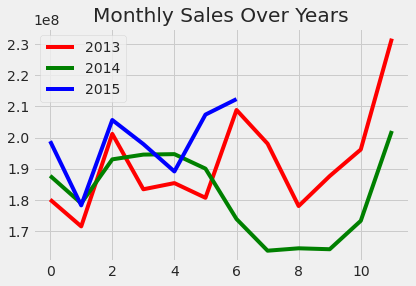

In [49]:
#sales over the years
sales_df_2013 = Data_df1[Data_df1['Year']== 2013]
sales_df_2014 = Data_df1[Data_df1['Year']==2014]
sales_df_2015 = Data_df1[Data_df1['Year']== 2015]

#gathering monthly sales of each year using groupby
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='red')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='green')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='blue')
plt.title('Monthly Sales Over Years')
plt.legend()

## **sum of sales over store type**

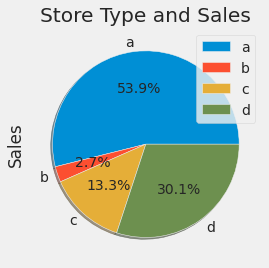

In [50]:
#Store Type and Sales Exploration
store_type = Data_df1.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

#store type and it's influence on sales
Data_df1.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

## **total of customers over store type**

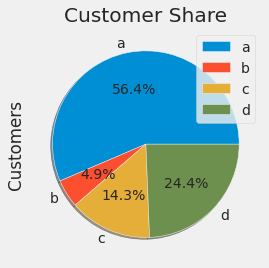

In [51]:
#customers and store type
Data_df1.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

## **share of store types**

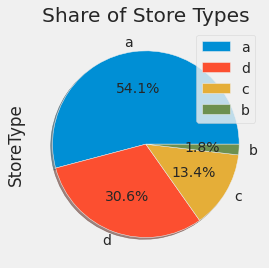

In [52]:
#store types in all of the dataset
Data_df1["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

### **promo2 participation over store type**

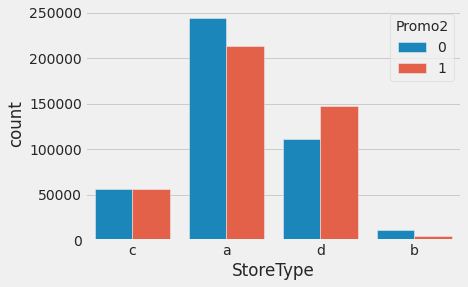

In [53]:
#count plot of number of stores which are participated or not in promo2 based on store type
sns.countplot(x=Data_df1['StoreType'],hue=Data_df1['Promo2'])
plt.rcParams['figure.figsize'] = (18, 5)

### Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating 


### **competition open sice month & year over each store type**

In [54]:
#value counts of competioin since month
store_df.value_counts('CompetitionOpenSinceMonth')

CompetitionOpenSinceMonth
9.0     479
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
dtype: int64

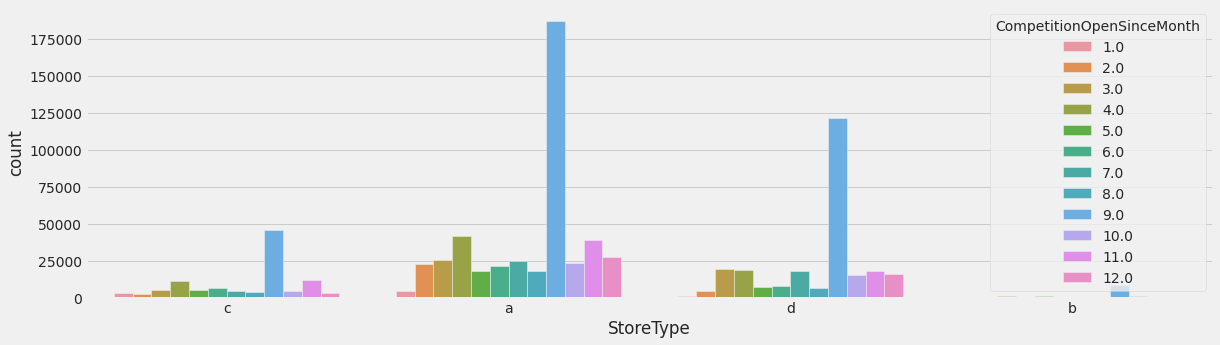

In [55]:
#plot of month of store types which started facing competition
sns.countplot(x=Data_df1['StoreType'],hue=Data_df1['CompetitionOpenSinceMonth'])
plt.rcParams['figure.figsize'] = (18, 5)

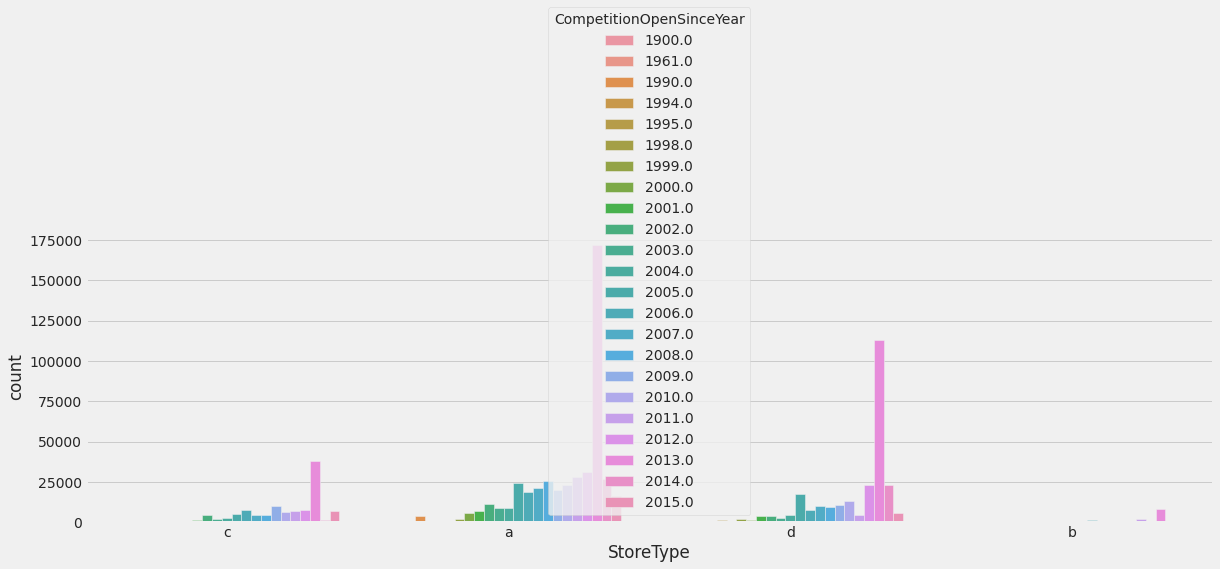

In [56]:
#plot of year of store types which started facing competition
sns.countplot(x=Data_df1['StoreType'],hue=Data_df1['CompetitionOpenSinceYear'])
plt.rcParams['figure.figsize'] = (18, 5)

### in the 9th month most of the competitors are came on action for all the store types
### All type of stores are started to facing more competitors in the year of 2013

In [57]:
#Droping Date feature
Data_df1.drop(['Date'], axis = 1, inplace = True)

# **Counting unique variables in categorical features for encoding**

In [58]:
#for unique variables of state holiday
Data_df1['StateHoliday'].unique()

array(['0', 0, 'a', 'b', 'c'], dtype=object)

In [59]:
#for unique variables of assortment
Data_df1['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [60]:
#for unique variables of store type
Data_df1['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [61]:
#for unique variables of promo interval
Data_df1['PromoInterval'].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

# OneHotEncoding

In [62]:
#for dummification to do one hot encoding
final_Data = pd.get_dummies(Data_df1,drop_first = True)

In [63]:
final_Data

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,Week,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,2015,7,31,3,...,0,0,0,1,0,0,0,0,0,0
1,1,4,5020,546,1,1,2015,7,30,3,...,0,0,0,1,0,0,0,0,0,0
2,1,3,4782,523,1,1,2015,7,29,3,...,0,0,0,1,0,0,0,0,0,0
3,1,2,5011,560,1,1,2015,7,28,3,...,0,0,0,1,0,0,0,0,0,0
4,1,1,6102,612,1,1,2015,7,27,3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,6905,471,1,1,2013,1,7,2,...,0,0,0,0,1,0,1,0,0,1
1017204,1115,6,4771,339,0,1,2013,1,5,1,...,0,0,0,0,1,0,1,0,0,1
1017205,1115,5,4540,326,0,1,2013,1,4,1,...,0,0,0,0,1,0,1,0,0,1
1017206,1115,4,4297,300,0,1,2013,1,3,1,...,0,0,0,0,1,0,1,0,0,1


In [64]:
#correlation matrix
final_Data.corr()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,Week,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
Store,1.000000,0.000343,0.007723,0.033991,-0.000015,0.000526,0.000300,0.001371,-0.000127,0.000014,...,0.000315,0.000428,-0.001061,0.060835,-0.050692,0.021376,0.003605,0.007788,0.011676,-0.013312
DayOfWeek,0.000343,1.000000,-0.178753,-0.097266,-0.289268,-0.139319,0.002099,-0.019710,0.008525,0.001695,...,-0.008676,0.002702,0.038016,-0.003181,-0.004077,0.027509,-0.001496,-0.002223,-0.001177,-0.001297
Sales,0.007723,-0.178753,1.000000,0.823552,0.368199,0.038635,0.036151,0.073589,-0.051865,0.029450,...,0.012380,0.008237,0.144685,-0.002891,-0.028627,0.053841,0.103257,-0.061711,-0.046940,-0.077486
Customers,0.033991,-0.097266,0.823552,1.000000,0.182859,0.024915,-0.000842,0.053843,-0.035416,0.012658,...,0.030188,0.018434,0.430137,0.051685,-0.259187,0.322247,-0.024493,-0.088371,-0.104929,-0.086168
Promo,-0.000015,-0.289268,0.368199,0.182859,1.000000,0.028971,0.023990,-0.006412,-0.126442,0.065995,...,-0.002677,-0.008234,-0.017843,0.002163,0.000989,-0.012921,0.000939,0.000714,-0.001239,0.000591
SchoolHoliday,0.000526,-0.139319,0.038635,0.024915,0.028971,1.000000,-0.038686,0.118467,0.038085,-0.021958,...,0.025377,0.018717,-0.002988,0.002764,-0.003301,-0.002782,-0.002429,-0.001668,-0.006087,-0.002838
Year,0.000300,0.002099,0.036151,-0.000842,0.023990,-0.038686,1.000000,-0.268835,0.008387,0.009977,...,0.003066,-0.003999,0.003217,0.001203,-0.002376,0.001360,0.001892,-0.000552,-0.006426,0.000802
Month,0.001371,-0.019710,0.073589,0.053843,-0.006412,0.118467,-0.268835,1.000000,-0.006577,0.003168,...,-0.007713,0.016979,0.004988,0.006066,-0.011006,0.002143,0.008106,-0.000263,-0.030130,0.002762
Day,-0.000127,0.008525,-0.051865,-0.035416,-0.126442,0.038085,0.008387,-0.006577,1.000000,-0.086253,...,-0.006039,0.010244,-0.001828,-0.000250,0.000578,-0.001290,0.000249,0.000533,0.000986,0.000206
Week,0.000014,0.001695,0.029450,0.012658,0.065995,-0.021958,0.009977,0.003168,-0.086253,1.000000,...,0.001546,-0.012533,-0.002038,-0.000054,0.000148,-0.001534,-0.000042,0.000229,0.000387,-0.000066


## **correlation heatmap**

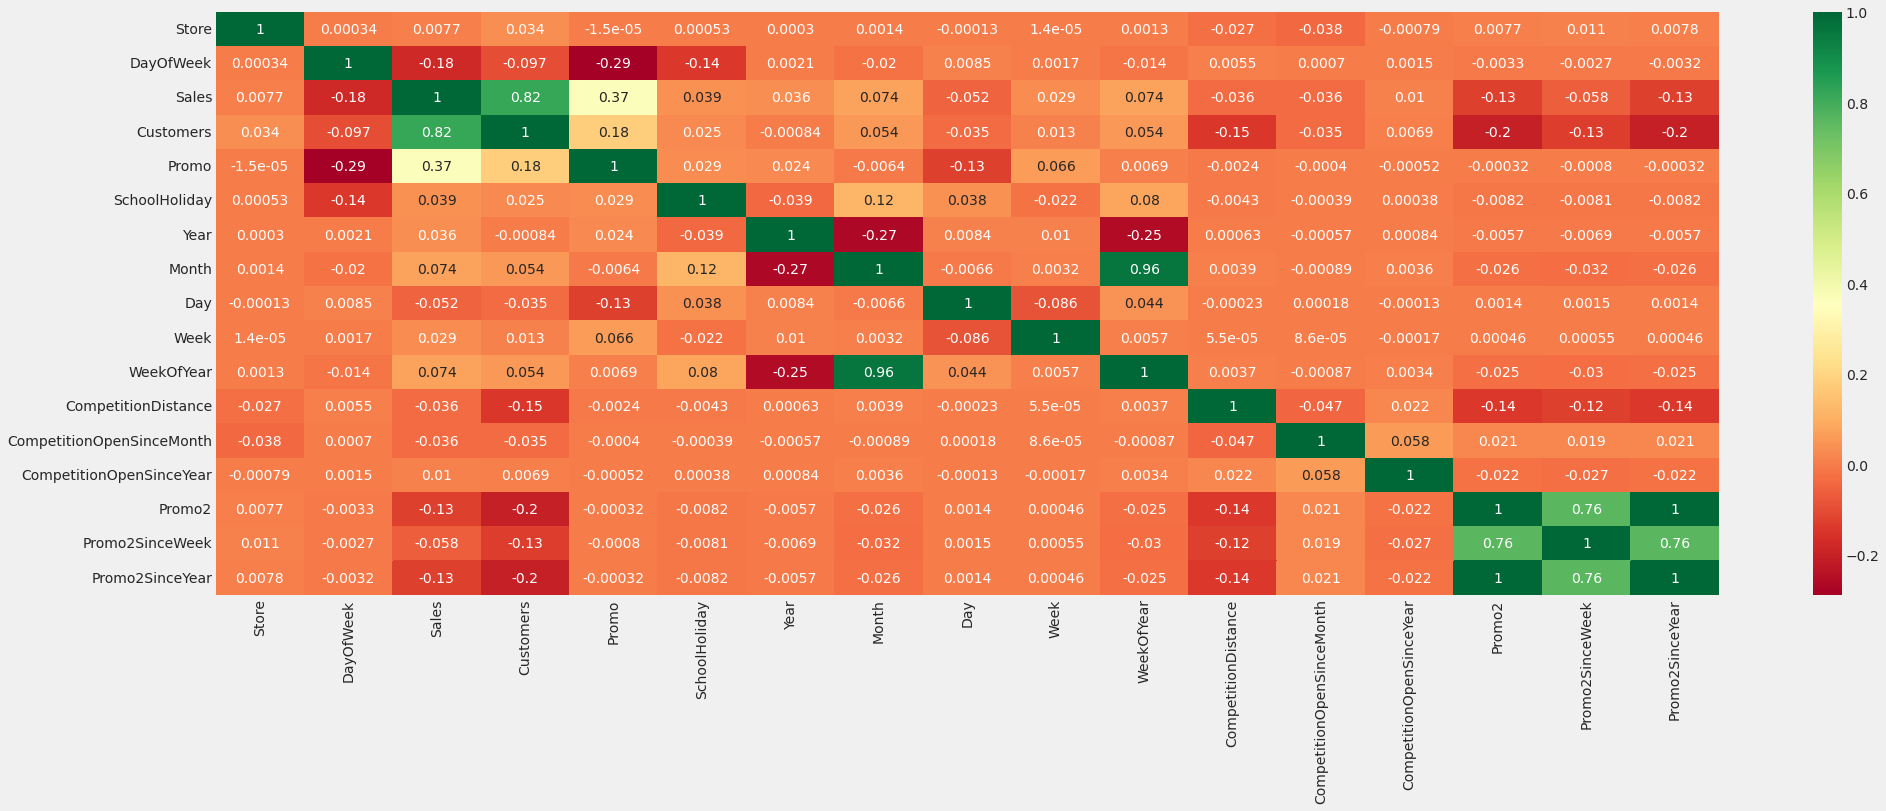

In [65]:
#for correlation heat map
heatmaps = Data_df1.corr()
top_corr_features = heatmaps.index
plt.figure(figsize=(30,10))
g=sns.heatmap(final_Data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Linear Regression

In [66]:
#separating dependent variable and indipendent variable in data
X = final_Data.drop(columns='Sales',axis=1)
Y = final_Data['Sales']

In [67]:
#train test split
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state =2)

In [68]:
#for linear regression algoritham
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [69]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
  return sqrt(mean_squared_error(x,y))
  

In [70]:
# definte MAPE function (mean absolute percentage error function)
def mape(x, y):
  return np.mean(np.abs((x-y)/x))*100

In [71]:
#for printing RMSE,MAPE of train & test of model
print("Regresion Model Score" , ":" , reg.score(X_train, Y_train) , "," ,
      "Out of Sample Test Score" ,":" , reg.score(X_test, Y_test))

Y_pred =reg.predict(X_train)
Y_test_pred=reg.predict(X_test)

print("Training RMSE", ":", rmse(Y_train, Y_pred),
      "Testing RMSE", ":", rmse(Y_test, Y_test_pred))
print("Training MAPE", ":", mape(Y_train, Y_pred),
      "Testing MAPE", ":", mape(Y_test, Y_test_pred))

Regresion Model Score : 0.8274233273011311 , Out of Sample Test Score : 0.8278685886721219
Training RMSE : 1290.1473637435934 Testing RMSE : 1284.715533893338
Training MAPE : 14.258725372180493 Testing MAPE : 14.237283991498026


In [72]:
#printing r2 value of model
from sklearn.metrics import r2_score 
r2_score(Y_test_pred,Y_test)

0.7925457635775739

In [73]:
#printing adjusted r2
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8278400426636927


In [74]:
#table of predicted and actual values of target variable
lr=pd.DataFrame(zip(Y_test,Y_test_pred),columns=['actual sales','predicted sales'])
lr

,actual sales,predicted sales
0,11554,9743.224506
1,5371,5475.286660
2,7249,7506.760736
3,5272,5879.261795
4,7143,7000.895714
...,...,...
168863,9281,9016.236203
168864,4640,5223.709327
168865,5648,5369.478586
168866,7692,7214.045726


from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

# XGBooster

In [75]:
regressor = XGBRegressor()

In [76]:
regressor.fit(X_train , Y_train)

[10:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [77]:
#for printing RMSE,MAPE of train & test of model
print("Regresion Model Score" , ":" , regressor.score(X_train, Y_train) , "," ,
      "Out of Sample Test Score" ,":" , regressor.score(X_test, Y_test))

Y_pred =regressor.predict(X_train)
Y_test_pred=regressor.predict(X_test)


print("Training RMSE", ":", rmse(Y_train, Y_pred),
      "Testing RMSE", ":", rmse(Y_test, Y_test_pred))
print("Training MAPE", ":", mape(Y_train, Y_pred),
      "Testing MAPE", ":", mape(Y_test, Y_test_pred))

Regresion Model Score : 0.8909047561741499 , Out of Sample Test Score : 0.8909871927008151
Training RMSE : 1025.7728078374146 Testing RMSE : 1022.3878328126475
Training MAPE : 11.533789217811334 Testing MAPE : 11.506147893236458


In [78]:
#printing r2 value of model
r2_score(Y_test_pred,Y_test)

0.8676506481488033

In [79]:
#printing adjusted r2
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8909691141845696


In [80]:
#table of predicted and actual values of target variable
xg=pd.DataFrame(zip(Y_test,Y_test_pred),columns=['actual sales','predicted sales'])
xg

,actual sales,predicted sales
0,11554,9855.714844
1,5371,5494.124512
2,7249,7734.837402
3,5272,5824.104004
4,7143,6777.950195
...,...,...
168863,9281,9170.564453
168864,4640,5511.426270
168865,5648,5564.774902
168866,7692,7593.978516


# Decision Tree Regressor

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
des_reg = DecisionTreeRegressor(random_state= 10)
cross_val_score(des_reg,X_train,Y_train,cv = 10).mean()

0.9491060321511645

In [83]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(X_train, Y_train)

In [84]:
#for printing RMSE,MAPE of train & test of model
print("Regresion Model Score" , ":" , treereg.score(X_train, Y_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(X_test, Y_test))

Y_pred =treereg.predict(X_train)
Y_test_pred=treereg.predict(X_test)

print("Training RMSE", ":", rmse(Y_train, Y_pred),
      "Testing RMSE", ":", rmse(Y_test, Y_test_pred))
print("Training MAPE", ":", mape(Y_train, Y_pred),
      "Testing MAPE", ":", mape(Y_test, Y_test_pred))

Regresion Model Score : 0.9651549601419527 , Out of Sample Test Score : 0.9554566230031896
Training RMSE : 579.7206311698563 Testing RMSE : 653.5344418724785
Training MAPE : 5.475859104159557 Testing MAPE : 6.18723901531489


In [85]:
#printing r2 value of model
r2_score(Y_test_pred,Y_test)

0.9538234578647042

In [86]:
#printing adjusted r2
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.9554492359980787


In [87]:
#table of predicted and actual values of target variable
dt=pd.DataFrame(zip(Y_test,Y_test_pred),columns=['actual sales','predicted sales'])
dt

,actual sales,predicted sales
0,11554,11854.650000
1,5371,5428.379310
2,7249,7786.081081
3,5272,5296.500000
4,7143,7170.666667
...,...,...
168863,9281,8679.520000
168864,4640,4726.952381
168865,5648,6135.166667
168866,7692,6828.769231


# Random Forest Regressor




In [88]:
#importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10 , random_state = 0)

rfr.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [89]:

y_predict_RFReg =  rfr.predict((X_test))

In [90]:
#for printing RMSE,MAPE of train & test of model
print("Regresion Model Score" , ":" , rfr.score(X_train, Y_train) , "," ,
      "Out of Sample Test Score" ,":" , rfr.score(X_test, Y_test))

Y_pred =rfr.predict(X_train)
Y_test_pred=rfr.predict(X_test)


print("Training RMSE", ":", rmse(Y_train, Y_pred),
      "Testing RMSE", ":", rmse(Y_test, Y_test_pred))
print("Training MAPE", ":", mape(Y_train, Y_pred),
      "Testing MAPE", ":", mape(Y_test, Y_test_pred))

Regresion Model Score : 0.9950332069277624 , Out of Sample Test Score : 0.9735620401837538
Training RMSE : 218.87003476565175 Testing RMSE : 503.49003515588976
Training MAPE : 2.0096992769840645 Testing MAPE : 4.972167897259814


In [91]:
#printing r2 value of model
r2_score(Y_test_pred,Y_test)

0.9726103086129319

In [92]:
#printing adjusted r2
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.9735576557531729


In [93]:
#table of predicted and actual values of target variable
rf=pd.DataFrame(zip(Y_test,Y_test_pred),columns=['actual sales','predicted sales'])
rf

,actual sales,predicted sales
0,11554,11455.2
1,5371,5420.3
2,7249,7563.2
3,5272,5593.0
4,7143,7170.6
...,...,...
168863,9281,9105.7
168864,4640,4635.0
168865,5648,5934.0
168866,7692,7160.8


Text(0.5, 0, 'Relative Importance')

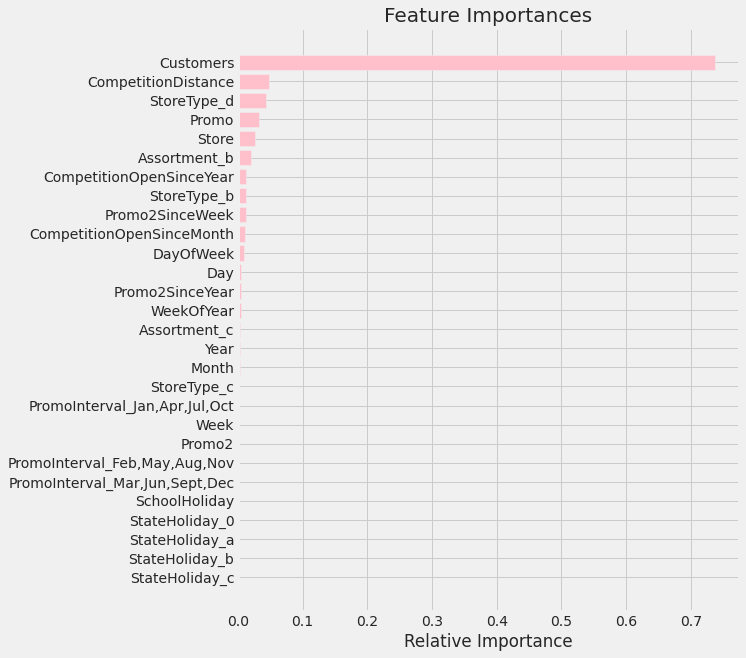

In [94]:
#for ploting relative feature importance of features in data
features = X_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')